In [1]:
%cd ..

C:\Users\Brown Research\Documents\vr-exoskeleton


# vector_field

Plot a generalization of the underlying function learned by a model.

In [2]:
import os

import numpy as np
import torch

from vr_exoskeleton import gaze_modeling, vector_field

In [3]:
rng = np.random.default_rng(seed=4)
rng.multivariate_normal(vector_field.EYE_DIFF_MEAN, vector_field.EYE_DIFF_COV, 5)

array([[ 0.02554326,  0.00639231],
       [-0.04205946, -0.00660157],
       [ 0.04772849,  0.02390291],
       [ 0.02072256,  0.01335342],
       [ 0.04376169,  0.02906013]])

In [4]:
points = list()
x_step, y_step = 0.01, 0.01
for y in range(-40, 21):
    for x in range(-25, 26):
        points.append((x * x_step, y * y_step))
print(len(points))
points[0], points[-1]

3111


((-0.25, -0.4), (0.25, 0.2))

## MLP

In [5]:
stamp = '1739896178_mlp_90hz-angle-h_s48'

path_weights = os.path.join('output', stamp, 'val_best.pth')
weights = torch.load(path_weights, weights_only=True)

model = gaze_modeling.GazeMLP(hidden_sizes=[])
model.load_state_dict(weights)

<All keys matched successfully>

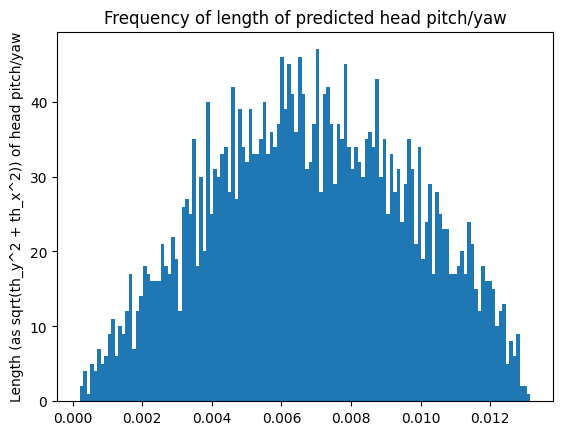

In [6]:
point_to_theta_mlp = vector_field.predict_thetas(model, points, [0., 0., 1.], rng)

vector_field.hist_thetas(point_to_theta_mlp)

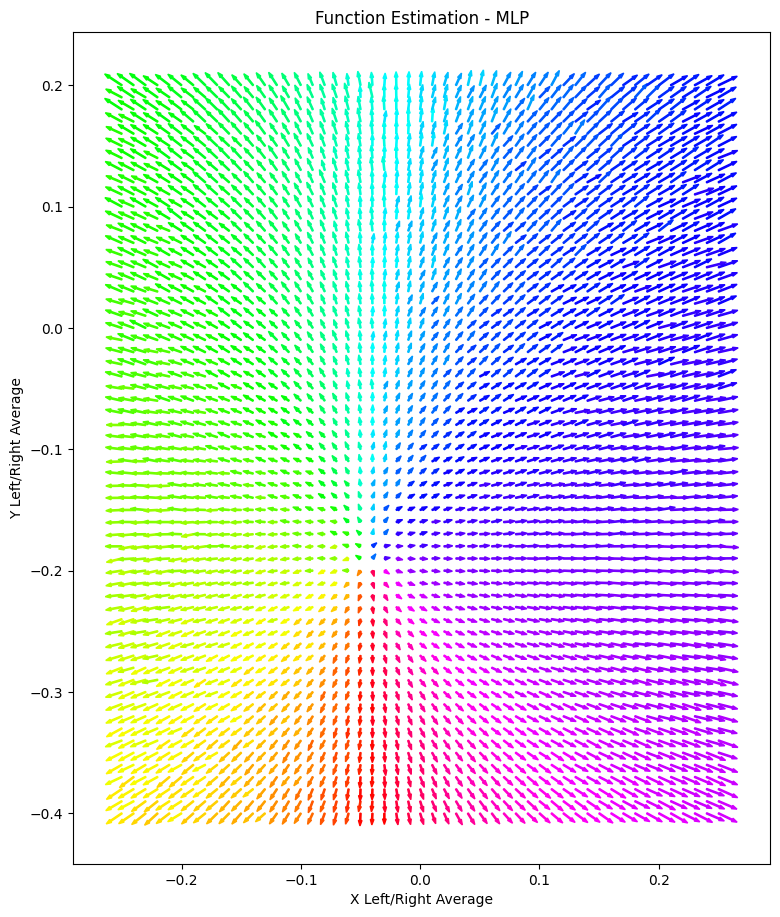

In [8]:
vector_field.plot_vector_field(point_to_theta_mlp, title='Function Estimation - MLP')